### Simple Neural network with single learning neuron
This is a simple model with single neuron with three input and single output.

We’re going to train the neuron to solve the problem below. The first four examples are called a training set. Can you work out the pattern? Should the ‘?’ be 0 or 1?

|          | Input | |  | Output |
|----------|---|---|---|--------|
| Example 1| 0 | 0 | 1  | 0      |
| Example 2| 1 | 1 | 1  | 1      |
| Example 3| 1 | 0 | 1  | 1      |
| Example 3| 0 | 1 | 1  | 1      |
| Test     | 0 | 1 | 1  | ?      |


In above example output is always equal to the value of the leftmost input column. Therefore the answer is the ‘?’ should be 1.

In [1]:
from numpy import exp, array, random, dot, arange
class NeuralNetwork():
    def __init__(self):
        # seed the random number generator, so that it generated same number every time 
        random.seed(1)
        # We model a single neuron, with 3 input connections and 1 output connection.
        # We assign random weights to a 3 x 1 matrix, with values in the range -1 to 1
        # and mean 0.
        self.synaptic_weights = 2 * random.random((3, 1)) - 1
        # To store error at each iteration 
        self.train_error=[]
        
    # The Sigmoid function, which describes an S shaped curve.
    # We pass the weighted sum of the inputs through this function to
    # normalise them between 0 and 1.    
    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))
    
    # The derivative of the Sigmoid function.
    # This is the gradient of the Sigmoid curve.
    # It indicates how confident we are about the existing weight.
    def __sigmoid_derivative(self, x):
        return x * (1 - x)
    
    # We train the neural network through a process of trial and error.Adjusting the synaptic weights each time.
    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
        for iteration in range(number_of_training_iterations):
            # Pass the training set through our neural network (a single neuron).
            output = self.neuron(training_set_inputs)
            error = training_set_outputs - output # calculate error
            self.train_error.append(error)
            # Multiply the error by the input and again by the gradient of the Sigmoid curve.
            # This means less confident weights are adjusted more.
            # This means inputs, which are zero, do not cause changes to the weights.
            adjustment = dot(training_set_inputs.T, error * self.__sigmoid_derivative(output))
            self.synaptic_weights += adjustment # Adjusting weights
    
    # Pass inputs through our neural network (our single neuron).        
    def neuron(self, inputs):
        return self.__sigmoid(dot(inputs, self.synaptic_weights))
    
    # Return the array of error at each iteration
    def getTrain_error(self):
        return self.train_error

neural_network = NeuralNetwork()     #Intialise a single neuron neural network.

print("Random starting synaptic weights: ")
print(neural_network.synaptic_weights)

# The training set. We have 4 examples, each consisting of 3 input values and 1 output value.
training_set_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
training_set_outputs = array([[0, 1, 1, 0]]).T

# Train the neural network using a training set.
# Do it 10,00 times and make small adjustments each time.
number_of_training_iterations=1000
neural_network.train(training_set_inputs, training_set_outputs, number_of_training_iterations)
print("New synaptic weights after training: ")
print(neural_network.synaptic_weights)


# Test the neural network with a new situation.
print("Considering new situation [1, 0, 0] -> ?: ")
print(neural_network.neuron(array([1, 0, 0])))

Random starting synaptic weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
New synaptic weights after training: 
[[ 7.26283009]
 [-0.21614618]
 [-3.41703015]]
Considering new situation [1, 0, 0] -> ?: 
[ 0.99929937]


#### First the neural network assigned itself random weights, then trained itself using the training set. Then it considered a new situation [1, 0, 0] and predicted 0.99993704. The correct answer was 1. So very close!


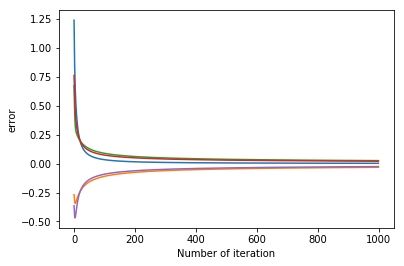

In [2]:
#Plotting errors in training set with number of iterations
import matplotlib.pyplot as plt
x=arange(number_of_training_iterations)
y=[]
error=neural_network.getTrain_error()
y1=[];y2=[];y3=[];y4=[]
for i in range(len(error)):
    y.append(sum(error[i]**2)) # taking mean square for each input
    y1.append(error[i][0])
    y2.append(error[i][1])
    y3.append(error[i][2])
    y4.append(error[i][3])
plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
plt.ylabel('error')
plt.xlabel('Number of iteration')
plt.show()

### This plot is error vs number of iteration
 Each line here represent for each training set data how error rate reduces in each iteration and after certain iteration they all converges near 0, represening error is reducing with more number of iteration